## differential privacy--Privacy-Aware Intrusion Detection System (IDS)

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
train = 'Train.txt'
test = 'Test.txt'
test21 = 'Test-21.txt'

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]



In [4]:
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)

In [5]:
test_21 = pd.read_csv(test21, names= feature)

In [6]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

In [8]:
# number of attack labels 
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Text(0.5, 1.0, 'no of samples for each attack')

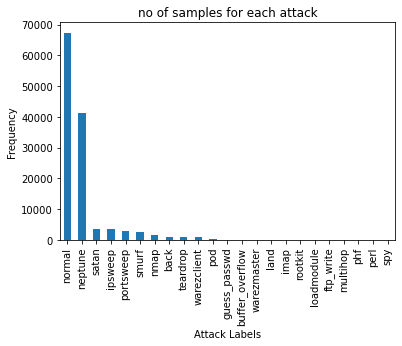

In [9]:
def bar_graph(feature):
  train_data[feature].value_counts().plot(kind="bar")
bar_graph('label')
plt.xlabel('Attack Labels')
plt.ylabel('Frequency')
plt.title('no of samples for each attack')

## Data Normalization

In [10]:
# selecting numeric attributes columns from data
numeric_col = train_data.select_dtypes(include='number').columns

In [11]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [12]:
# calling the normalization() function
data = standardization(train_data.copy(),numeric_col)
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [13]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [14]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = train_data.copy()
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal


In [15]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,1
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,1
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0


In [16]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [17]:
change_label(train_data)

In [18]:
# distribution of attack classes
train_data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

Text(0.5, 1.0, 'no of samples for each attack class')

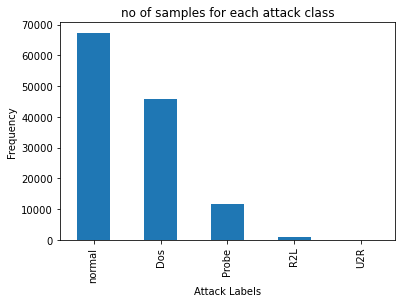

In [19]:
bar_graph('label')
plt.xlabel('Attack Labels')
plt.ylabel('Frequency')
plt.title('no of samples for each attack class')

In [20]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [21]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [22]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [23]:
# one-hot-encoding attack label
#multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
#multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,4
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,4
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0


In [24]:
multi_data['intrusion']

0         4
1         4
2         0
3         4
4         4
         ..
125968    0
125969    4
125970    4
125971    0
125972    4
Name: intrusion, Length: 125973, dtype: int32

In [25]:
#Normalized_dataset = pd.get_dummies(Normalized_dataset, columns=Normalized_dataset['label'])
#Normalized_dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


X = data[['src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'logged_in', 'diff_srv_rate', 'srv_serror_rate',
       'serror_rate', 'count', 'dst_host_same_src_port_rate',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'srv_count',
       'dst_host_rerror_rate', 'dst_host_count', 'dst_host_srv_serror_rate']]

Y = bin_data['intrusion']

In [26]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 
  

### Linear Support Vector Machine Classifier (Binary Classification)

In [27]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset


SVC(gamma='auto', kernel='linear')

In [28]:

y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  93.59243030418493


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the string labels in y_test and y_pred
y_test= label_encoder.fit_transform(y_test)
y_pred= label_encoder.transform(y_pred)

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.06407569695815075
Mean Squared Error -  0.06407569695815075
Root Mean Squared Error -  0.25313177785128194
R2 Score -  74.29966180838876
Accuracy -  93.59243030418493


### K-nearest-neighbor Classifier (Binary Classification)

In [30]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset
     

KNeighborsClassifier()

In [31]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.97440782371245


In [32]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



In [33]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.010255921762875469
Mean Squared Error -  0.010255921762875469
Root Mean Squared Error -  0.1012715249360622
R2 Score -  95.88060350581387
Accuracy -  98.97440782371245


### Random Forest

In [34]:
# Creating and training the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
# Predictions on the training set for evaluation purposes
rf_train_pred = rf_model.predict(X_train)

# Mean Absolute Error
mae = mean_absolute_error(y_train, rf_train_pred)

# Mean Squared Error
mse = mean_squared_error(y_train, rf_train_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R2 Score
r2 = r2_score(y_train, rf_train_pred)

# Accuracy (assuming classification problem)
accuracy = accuracy_score(y_train, rf_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2*100)
print("Accuracy:", accuracy*100)

Mean Absolute Error: 4.2337450650409084e-05
Mean Squared Error: 4.2337450650409084e-05
Root Mean Squared Error: 0.006506723495770286
R2 Score: 99.98298047337671
Accuracy: 99.99576625493496


### XGBoost

In [36]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()  # Use XGBRegressor() for a regression problem

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predictions on the training set for evaluation purposes
xgb_train_pred = xgb_model.predict(X_train)

# Mean Absolute Error
mae = mean_absolute_error(y_train, xgb_train_pred)

# Mean Squared Error
mse = mean_squared_error(y_train, xgb_train_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R2 Score
r2 = r2_score(y_train, xgb_train_pred)

# Accuracy (assuming classification problem)
accuracy = accuracy_score(y_train, xgb_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2*100)
print("Accuracy:", accuracy*100)

Mean Absolute Error: 0.00013759671461382954
Mean Squared Error: 0.00013759671461382954
Root Mean Squared Error: 0.011730162599633031
R2 Score: 99.94468653847433
Accuracy: 99.98624032853863


### accuracy of different models plot¶

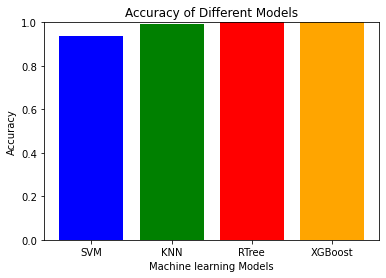

In [37]:
# Predictions
svm_pred = lsvm.predict(X_train)
knn_pred = knn.predict(X_train)
tree_pred = rf_model.predict(X_train)
xgboost_pred = xgb_model.predict(X_train)

# Accuracy scores
svm_accuracy = accuracy_score(y_train, svm_pred)
knn_accuracy = accuracy_score(y_train, knn_pred)
tree_accuracy = accuracy_score(y_train, tree_pred)
xgboost_accuracy = accuracy_score(y_train, xgboost_pred)

# Plotting the bar graph
labels = ['SVM', 'KNN', 'RTree', 'XGBoost']
accuracies = [svm_accuracy, knn_accuracy, tree_accuracy, xgboost_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Machine learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.0, 1.0)  # Set y-axis limit from 0 to 1
plt.show()

## Parameter Table

In [38]:
# Function to train SVM with given parameters and return accuracy
def train_svm_and_get_accuracy(kernel, gamma, X_train, y_train, X_test, y_test):
    svm = SVC(kernel=kernel, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define different kernel and gamma values
kernels = ['linear', 'rbf']
gamma_values = ['auto', 0.1, 0.01]  # You can specify any other gamma values

# Train SVM with different parameters and store accuracy in a table
results = []
for kernel in kernels:
    for gamma in gamma_values:
        accuracy = train_svm_and_get_accuracy(kernel, gamma, X_train, y_train, X_test, y_test)
        results.append({'Kernel': kernel, 'Gamma': gamma, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the parameter table
print(results_df)


   Kernel Gamma  Accuracy
0  linear  auto  0.935924
1  linear   0.1  0.935924
2  linear  0.01  0.935924
3     rbf  auto  0.977075
4     rbf   0.1  0.978790
5     rbf  0.01  0.969423


In [39]:
# Function to train KNN with given parameters and return accuracy
def train_knn_and_get_accuracy(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define different values for n_neighbors and distance metrics
neighbors = [3, 4]
metrics = ['euclidean', 'minkowski', 'manhattan']

# Train KNN with different parameters and store accuracy in a table

results = []
for n_neighbors in neighbors:
    for metric in metrics:
        accuracy = train_knn_and_get_accuracy(n_neighbors, metric, X_train, y_train, X_test, y_test)
        results.append({'n_neighbors': n_neighbors, 'metric': metric, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the parameter table
print(results_df)

   n_neighbors     metric  Accuracy
0            3  euclidean  0.990570
1            3  minkowski  0.990570
2            3  manhattan  0.990824
3            4  euclidean  0.989077
4            4  minkowski  0.989077
5            4  manhattan  0.989712


In [40]:

# Function to train Random Forest with given parameters and return accuracy
def train_rf_and_get_accuracy(n_estimators, max_depth, X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define different values for n_estimators and max_depth
n_estimators_values = [50, 100]  # You can add more values if needed
max_depth_values = [10, 20, None]  # None represents no maximum depth

# Train Random Forest with different parameters and store accuracy in a table
results = []
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        accuracy = train_rf_and_get_accuracy(n_estimators, max_depth, X_train, y_train, X_test, y_test)
        results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the parameter table
print(results_df)

   n_estimators  max_depth  Accuracy
0            50       10.0  0.995269
1            50       20.0  0.997809
2            50        NaN  0.997841
3           100       10.0  0.995332
4           100       20.0  0.997936
5           100        NaN  0.997968


In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd

# Function to train XGBoost with given parameters and return accuracy
def train_xgb_and_get_accuracy(max_depth, learning_rate, n_estimators, X_train, y_train, X_test, y_test):
    xgb_model = xgb.XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define different parameter values
max_depth_values = [3, 5, 7]
learning_rate_values = [0.1, 0.2,0.4]
n_estimators_values = [50, 100, 150]

# Train XGBoost with different parameters and store accuracy in a table
results = []
for max_depth in max_depth_values:
    for learning_rate in learning_rate_values:
        for n_estimators in n_estimators_values:
            accuracy = train_xgb_and_get_accuracy(max_depth, learning_rate, n_estimators, X_train, y_train, X_test, y_test)
            results.append({'Max Depth': max_depth, 'Learning Rate': learning_rate, 'N Estimators': n_estimators, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the parameter table
print(results_df)


    Max Depth  Learning Rate  N Estimators  Accuracy
0           3            0.1            50  0.987204
1           3            0.1           100  0.992507
2           3            0.1           150  0.994570
3           3            0.2            50  0.992570
4           3            0.2           100  0.996126
5           3            0.2           150  0.997047
6           3            0.4            50  0.996349
7           3            0.4           100  0.997365
8           3            0.4           150  0.997809
9           5            0.1            50  0.995174
10          5            0.1           100  0.996730
11          5            0.1           150  0.997650
12          5            0.2            50  0.996825
13          5            0.2           100  0.997873
14          5            0.2           150  0.998063
15          5            0.4            50  0.997682
16          5            0.4           100  0.998095
17          5            0.4           150  0.

### confusion matrix

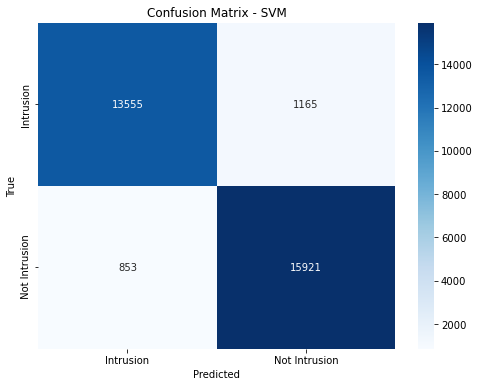

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming svm_model is your trained SVM model
# Make predictions on the test set
y_pred_svm = lsvm.predict(X_test)

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Intrusion', 'Not Intrusion'], yticklabels=['Intrusion', ' Not Intrusion'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

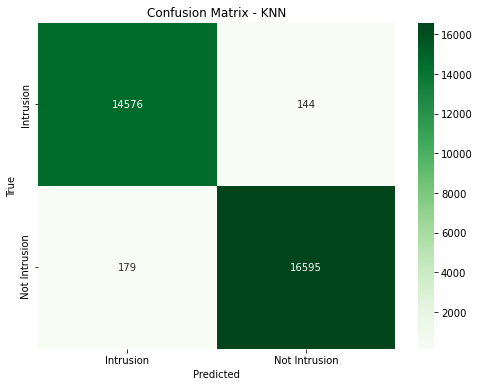

In [43]:
# Assuming knn_model is your trained KNN model
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',  xticklabels=['Intrusion', 'Not Intrusion'], yticklabels=['Intrusion', ' Not Intrusion'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()


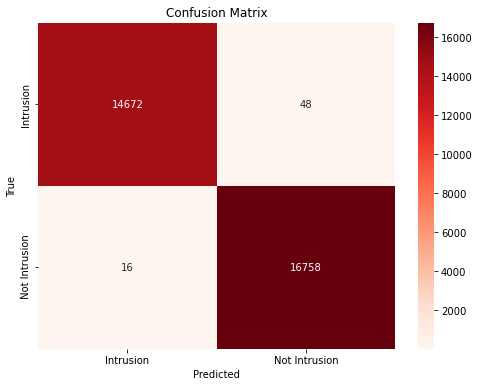

In [44]:
# Assuming rf_model is your trained Random Forest model
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',  xticklabels=['Intrusion', 'Not Intrusion'], yticklabels=['Intrusion', ' Not Intrusion'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


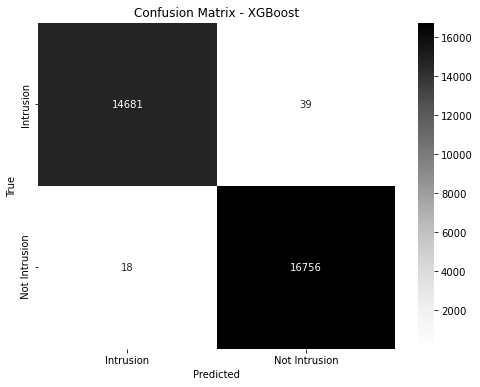

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming xgb_model is your trained XGBoost model
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greys',  xticklabels=['Intrusion', 'Not Intrusion'], yticklabels=['Intrusion', ' Not Intrusion'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [46]:
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,4
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,4
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0


In [47]:
X = data[['src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'logged_in', 'diff_srv_rate', 'srv_serror_rate',
       'serror_rate', 'count', 'dst_host_same_src_port_rate',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'srv_count',
       'dst_host_rerror_rate', 'dst_host_count', 'dst_host_srv_serror_rate']]

Y = multi_data['intrusion']

In [48]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

## Multi-class Classification

### Linear Support Vector Machine Classifier (Multi-class Classification)

In [49]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [50]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  93.5035244808535


In [51]:
from sklearn import metrics

# Your code for calculating and printing metrics
print("Mean Absolute Error - ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - ", metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)


Mean Absolute Error -  0.20600749349082365
Mean Squared Error -  0.694163967739887
Root Mean Squared Error -  0.8331650303150553
R2 Score -  81.12182270349892
Accuracy -  93.5035244808535


### K-nearest-neighbor Classifier (Multi-class Classification)


In [52]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [53]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

KNN-Classifier Multi-class Set-Accuracy is  98.84739950466755


In [54]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.98      0.98      0.98      2947
         R2L       0.81      0.84      0.82       274
         U2R       0.50      0.07      0.12        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.85      0.77      0.78     31494
weighted avg       0.99      0.99      0.99     31494



In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import numpy as np
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03283165047310599
Mean Squared Error -  0.10744903791198324
Root Mean Squared Error -  0.3277942005465979
R2 Score -  97.03576168941206
Accuracy -  98.84739950466755


### Random Forest model

In [56]:
# # Creating and training the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
# Predictions on the training set for evaluation purposes
rf_train_pred = rf_model.predict(X_train)

# Mean Absolute Error
mae = mean_absolute_error(y_train, rf_train_pred)

# Mean Squared Error
mse = mean_squared_error(y_train, rf_train_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R2 Score
r2 = r2_score(y_train, rf_train_pred)

# Accuracy (assuming classification problem)
accuracy = accuracy_score(y_train, rf_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2*100)
print("Accuracy:", accuracy*100)

Mean Absolute Error: 0.0001481810772764318
Mean Squared Error: 0.0005292181331301136
Root Mean Squared Error: 0.023004741535825036
R2 Score: 99.98541886869351
Accuracy: 99.99576625493496


### XGBoost

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import numpy as np

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()  # Use XGBRegressor() for a regression problem

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predictions on the training set for evaluation purposes
xgb_train_pred = xgb_model.predict(X_train)

# Mean Absolute Error
mae = mean_absolute_error(y_train, xgb_train_pred)

# Mean Squared Error
mse = mean_squared_error(y_train, xgb_train_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R2 Score
r2 = r2_score(y_train, xgb_train_pred)

# Accuracy (assuming classification problem)
accuracy = accuracy_score(y_train, xgb_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2*100)
print("Accuracy:", accuracy*100)

Mean Absolute Error: 0.00023285597857724996
Mean Squared Error: 0.0008044115623577726
Root Mean Squared Error: 0.028362150171624377
R2 Score: 99.97783668041414
Accuracy: 99.99259094613619


### accuracy of different models plot


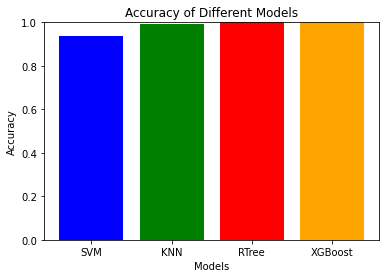

In [59]:
# Predictions
svm_pred = lsvm.predict(X_train)
knn_pred = knn.predict(X_train)
tree_pred = rf_model.predict(X_train)
xgboost_pred = xgb_model.predict(X_train)

# Accuracy scores
svm_accuracy = accuracy_score(y_train, svm_pred)
knn_accuracy = accuracy_score(y_train, knn_pred)
tree_accuracy = accuracy_score(y_train, tree_pred)
xgboost_accuracy = accuracy_score(y_train, xgboost_pred)

# Plotting the bar graph
labels = ['SVM', 'KNN', 'RTree', 'XGBoost']
accuracies = [svm_accuracy, knn_accuracy, tree_accuracy, xgboost_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.0, 1.0)  # Set y-axis limit from 0 to 1
plt.show()


### parameter table

In [60]:
# Function to train SVM with given parameters and return accuracy
def train_svm_and_get_accuracy(kernel, gamma, X_train, y_train, X_test, y_test):
    svm = SVC(kernel=kernel, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define different kernel and gamma values
kernels = ['linear', 'rbf']
gamma_values = ['auto', 0.1, 0.01]  # You can specify any other gamma values

# Train SVM with different parameters and store accuracy in a table
results = []
for kernel in kernels:
    for gamma in gamma_values:
        accuracy = train_svm_and_get_accuracy(kernel, gamma, X_train, y_train, X_test, y_test)
        results.append({'Kernel': kernel, 'Gamma': gamma, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the parameter table
print(results_df)


   Kernel Gamma  Accuracy
0  linear  auto  0.935035
1  linear   0.1  0.935035
2  linear  0.01  0.935035
3     rbf  auto  0.975646
4     rbf   0.1  0.978123
5     rbf  0.01  0.968597


In [61]:
# Function to train KNN with given parameters and return accuracy
def train_knn_and_get_accuracy(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define different values for n_neighbors and distance metrics
neighbors = [3, 4]
metrics = ['euclidean', 'minkowski', 'manhattan']

# Train KNN with different parameters and store accuracy in a table
results = []
for n_neighbors in neighbors:
    for metric in metrics:
        accuracy = train_knn_and_get_accuracy(n_neighbors, metric, X_train, y_train, X_test, y_test)
        results.append({'n_neighbors': n_neighbors, 'metric': metric, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the parameter table
print(results_df)


   n_neighbors     metric  Accuracy
0            3  euclidean  0.989427
1            3  minkowski  0.989427
2            3  manhattan  0.989839
3            4  euclidean  0.987839
4            4  minkowski  0.987839
5            4  manhattan  0.988728


In [62]:
# Function to train Random Forest with given parameters and return accuracy
def train_rf_and_get_accuracy(n_estimators, max_depth, X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define different values for n_estimators and max_depth
n_estimators_values = [50, 100]  # You can add more values if needed
max_depth_values = [10, 20, None]  # None represents no maximum depth

# Train Random Forest with different parameters and store accuracy in a table
results = []
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        accuracy = train_rf_and_get_accuracy(n_estimators, max_depth, X_train, y_train, X_test, y_test)
        results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the parameter table
print(results_df)


   n_estimators  max_depth  Accuracy
0            50       10.0  0.994348
1            50       20.0  0.997682
2            50        NaN  0.997777
3           100       10.0  0.994475
4           100       20.0  0.997777
5           100        NaN  0.997714


In [63]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pandas as pd

# Function to train XGBoost with given parameters and return accuracy
def train_xgb_and_get_accuracy(max_depth, learning_rate, n_estimators, X_train, y_train, X_test, y_test):
    xgb_model = xgb.XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define different parameter values
max_depth_values = [3, 5, 7]
learning_rate_values = [0.1, 0.2,0.4]
n_estimators_values = [50, 100, 150]
# Train XGBoost with different parameters and store accuracy in a table
results = []
for max_depth in max_depth_values:
    for learning_rate in learning_rate_values:
        for n_estimators in n_estimators_values:
            accuracy = train_xgb_and_get_accuracy(max_depth, learning_rate, n_estimators, X_train, y_train, X_test, y_test)
            results.append({'Max Depth': max_depth, 'Learning Rate': learning_rate, 'N Estimators': n_estimators, 'Accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the parameter table
print(results_df)

    Max Depth  Learning Rate  N Estimators  Accuracy
0           3            0.1            50  0.985235
1           3            0.1           100  0.995809
2           3            0.1           150  0.996793
3           3            0.2            50  0.995332
4           3            0.2           100  0.997269
5           3            0.2           150  0.997682
6           3            0.4            50  0.997428
7           3            0.4           100  0.997714
8           3            0.4           150  0.998063
9           5            0.1            50  0.996253
10          5            0.1           100  0.997650
11          5            0.1           150  0.997904
12          5            0.2            50  0.997682
13          5            0.2           100  0.998222
14          5            0.2           150  0.998349
15          5            0.4            50  0.998158
16          5            0.4           100  0.998285
17          5            0.4           150  0.

### confusion matrix

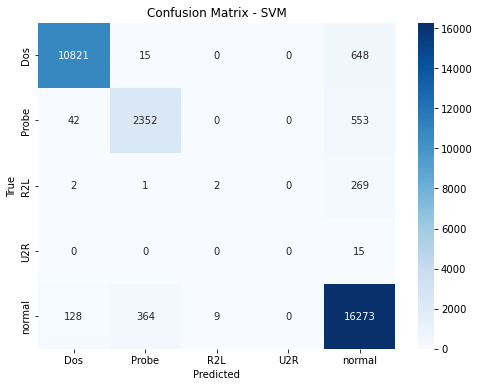

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming svm_model is your trained SVM model
# Make predictions on the test set
y_pred_svm = lsvm.predict(X_test)

# Define class labels for a multi-class classifier
class_labels = ['Dos', 'Probe', 'R2L', 'U2R', 'normal']

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()


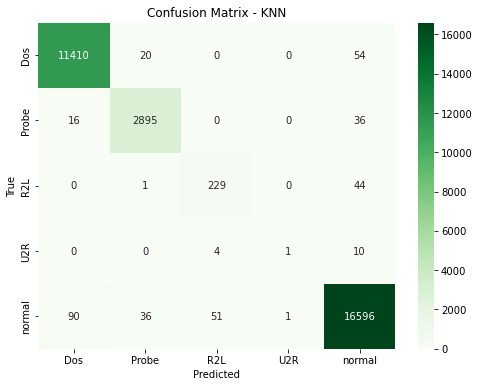

In [65]:
# Assuming knn_model is your trained KNN model
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Define class labels for a multi-class classifier
class_labels = ['Dos', 'Probe', 'R2L', 'U2R', 'normal']

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()


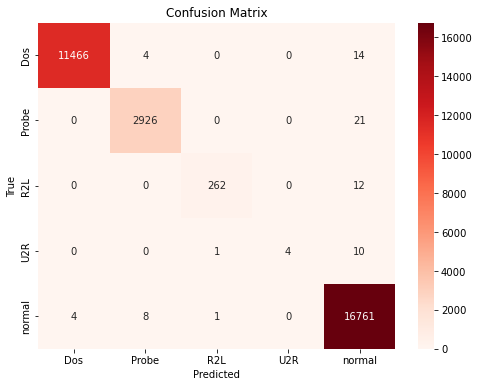

In [66]:
# Assuming rf_model is your trained Random Forest model
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Define class labels for a multi-class classifier
class_labels = ['Dos', 'Probe', 'R2L', 'U2R', 'normal']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


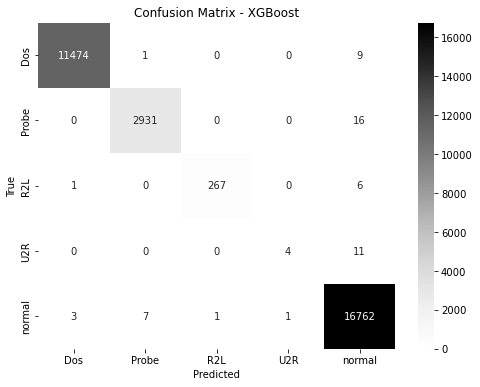

In [67]:
# Assuming xgb_model is your trained XGBoost model
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Define class labels for a multi-class classifier
class_labels = ['Dos', 'Probe', 'R2L', 'U2R', 'normal']

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greys', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost')
plt.show()